### Import forecaster libraries from current directory

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

import fcLib
from fcSelector import ForecasterFramework, default_params
from fcWrapper import ForecasterWrapper

### load example training data from external file

In [2]:
# load training data   
data = pd.read_csv('forecaster_example_data.csv', index_col = 0)
data.index = pd.to_datetime(data.index)

# Split the data into X and y
X_columns = [col for col in data.columns if not 'Ppv_forecast' in col]
y_columns = 'Ppv_forecast_1'
# y_columns = [col for col in data.columns if 'Ppv_forecast' in col]

X = data[X_columns]
y = data[y_columns]

# extract 2 series from X and y for predictions
Xtrain = X.iloc[:-48]
Xpredict1 = X.iloc[-48:-24]
Xpredict2 = X.iloc[-24:]

ytrain = y.iloc[:-48]
ypredict1 = y.iloc[-48:-24]
ypredict2 = y.iloc[-24:]

# package data for framework
data_eval = {
    'X': Xtrain,
    'y': ytrain
}

# simple func to plot predictions vs target
def plotPredictions(dataPred, dataAct):
    
    # convert dataPred from list to df with same index as dataAct
    ts = list(dataAct.index)
    zipped = list(zip(ts, dataPred))
    dataPred = pd.DataFrame(zipped, columns=['ts', 'value'])
        
    plt.figure(figsize = (10, 6))
    plt.plot(dataAct.index, dataAct, label = 'target', linestyle = 'dashed')
    plt.plot(dataPred.ts, dataPred.value, label = 'prediction')

    plt.legend()

    plt.tight_layout()
    plt.show()

### generate a list of forecaster candidates from models in fcLib

In [3]:
# create a list of forecaster candidate to evalute
fcList = fcLib.forecaster_list

# selecting 4 arbitrary forecaster options
fcListUser = [fcList[ii] for ii in [2,8,9,11]]

### package inputs and create new wrapper instance

In [4]:
input = {
    'training-data':data_eval, 
    'fcList': fcListUser, 
    'input-data': Xpredict1
}

# instantiate forecast framework wrapper
newWrapper = ForecasterWrapper()

# pass inputs
newWrapper.input = input

### use 'compute' method to train forecasters and generate new prediction

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08338D+00    |proj g|=  6.27255D-02

At iterate    5    f=  7.05601D+00    |proj g|=  9.65938D-03


 This problem is unconstrained.



At iterate   10    f=  7.05118D+00    |proj g|=  2.28570D-03

At iterate   15    f=  7.05102D+00    |proj g|=  8.47092D-03

At iterate   20    f=  7.05054D+00    |proj g|=  1.88695D-02

At iterate   25    f=  7.05038D+00    |proj g|=  7.33394D-03

At iterate   30    f=  7.02499D+00    |proj g|=  4.03674D-01

At iterate   35    f=  6.97730D+00    |proj g|=  1.56438D-02

At iterate   40    f=  6.97607D+00    |proj g|=  2.20101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     49      1     0     0   1.009D-05   6.976D+00
  F =   6.9760682403574625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

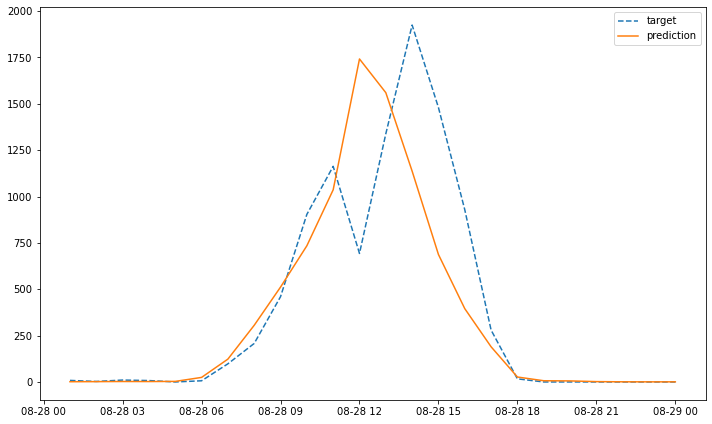

In [5]:
# run compute method to train and predict
newWrapper.compute()

plotPredictions(newWrapper.output['output-data'] , ypredict1)

### access results of forecaster training and selection in 

In [6]:
print(newWrapper.output['model-summary'])

# latest prediction can be accessed in output['output-data']

{'bestModelName': 'randomforestpipeline', 'bestScore': 0.9705690908437622}


### models will only be trained once, unless bestModel attr is removed

In [7]:
# model already selected, so wrapper simply generates prediction
newWrapper.compute()

'Done.'

In [8]:
# selected model is clears, models are trained an evaluated again using current stored data
newWrapper.bestModel = None
newWrapper.compute()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.08338D+00    |proj g|=  6.27255D-02

At iterate    5    f=  7.05601D+00    |proj g|=  9.65938D-03


 This problem is unconstrained.



At iterate   10    f=  7.05118D+00    |proj g|=  2.28570D-03

At iterate   15    f=  7.05102D+00    |proj g|=  8.47092D-03

At iterate   20    f=  7.05054D+00    |proj g|=  1.88695D-02

At iterate   25    f=  7.05038D+00    |proj g|=  7.33394D-03

At iterate   30    f=  7.02499D+00    |proj g|=  4.03674D-01

At iterate   35    f=  6.97730D+00    |proj g|=  1.56438D-02

At iterate   40    f=  6.97607D+00    |proj g|=  2.20101D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     49      1     0     0   1.009D-05   6.976D+00
  F =   6.9760682403574625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

'Done.'

### new predictions can be generated by passing new data to 'input' attr

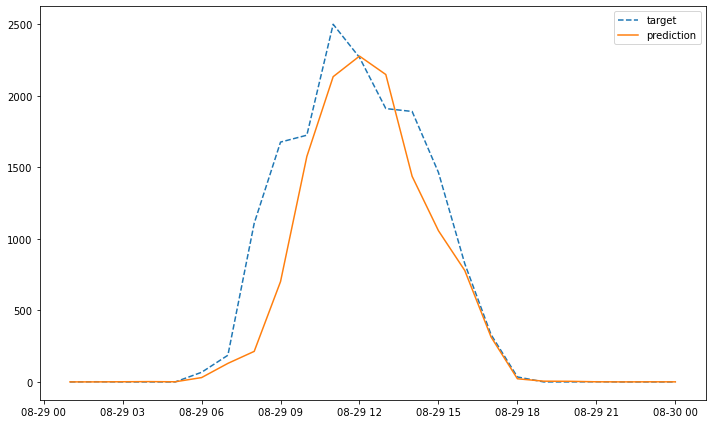

In [10]:
input = {
    'training-data':data_eval, 
    'fcList': fcListUser, 
    'input-data': Xpredict2
}

# pass inputs
newWrapper.input = input
newWrapper.compute()

plotPredictions(newWrapper.output['output-data'] , ypredict2)